In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import regionmask
import us_state_abbrev
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

### Step 0: Load state masks from [regionmask](https://regionmask.readthedocs.io/en/stable/) package

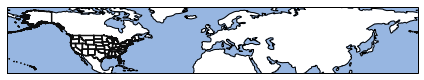

In [13]:
states = regionmask.defined_regions.natural_earth.us_states_10
states.plot(add_label=False);
plt.tight_layout()

## Step 1: State-level average environmental conditions

In [ ]:
ds = xr.open_dataset('../data/daily_spec_humidity_2020.nc')

In [ ]:
us_state_mask = states.mask(ds['longitude'], ds['latitude'], wrap_lon=True)
us_state_mask_ma = np.ma.masked_invalid(us_state_mask)

(40.5, 44.0)

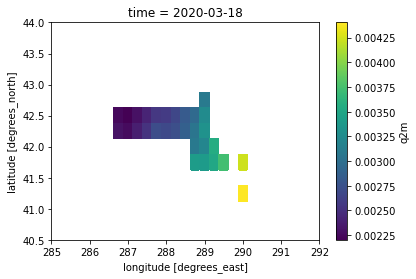

In [27]:
(ds['q2m'].where(us_state_mask_ma == states['Massachusetts'].number)).isel(time=-1).plot()
plt.xlim([285, 292])
plt.ylim([40.5,44])

Text(0.5, 1.0, 'Average specific humidity in Massachusetts in 2020')

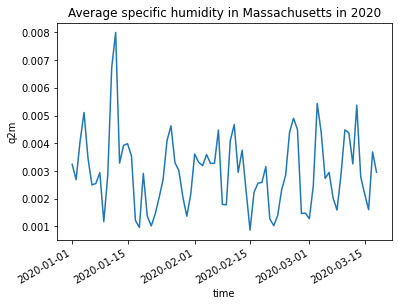

In [28]:
ds['q2m'].where(us_state_mask_ma == states['Massachusetts'].number).mean(dim=['latitude', 'longitude']).plot()
plt.title("Average specific humidity in Massachusetts in 2020")

## Step 2: State-level epidemiological data

In [31]:
from utils import *
df = load_jhu_df()
udf = df[df['Country/Region'] == 'US']
udf.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key
33,Washington,US,1/24/20 17:00,1.0,NaN,NaN,01-24-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Chicago,US,1/24/20 17:00,1.0,NaN,NaN,01-24-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,"Ashland, NE",US,2020-02-21T23:23:06,11.0,0.0,0.0,02-21-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,"Travis, CA",US,2020-02-21T23:23:06,5.0,0.0,0.0,02-21-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,"Chicago, IL",US,2020-02-09T19:03:03,2.0,0.0,2.0,02-21-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
udf[udf['Province/State'] == 'Massachusetts']

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key
270,Massachusetts,US,2020-03-11T22:53:03,95.0,0.0,1.0,03-11-2020,42.230200,-71.530100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,Massachusetts,US,2020-03-14T22:13:19,164.0,0.0,1.0,03-15-2020,42.230200,-71.530100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1178,Massachusetts,US,2020-03-20T23:43:03,413.0,1.0,0.0,03-20-2020,42.230200,-71.530100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1899,Massachusetts,US,2020-03-14T22:13:19,138.0,0.0,1.0,03-14-2020,42.230200,-71.530100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2379,Massachusetts,US,2020-03-18T14:13:56,218.0,0.0,0.0,03-18-2020,42.230200,-71.530100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2760,Massachusetts,US,2020-03-10T22:13:11,92.0,0.0,1.0,03-10-2020,42.230200,-71.530100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3357,Massachusetts,US,2020-03-11T20:00:00,123.0,0.0,1.0,03-13-2020,42.230171,-71.530106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3774,Massachusetts,US,2020-03-12T21:39:09,108.0,0.0,1.0,03-12-2020,42.230200,-71.530100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15538,Massachusetts,US,2020-03-17T22:53:02,218.0,0.0,1.0,03-17-2020,42.230200,-71.530100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16148,Massachusetts,US,2020-03-16T21:53:03,197.0,0.0,1.0,03-16-2020,42.230200,-71.530100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
